In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("magma_r", n_colors=9)

In [2]:
train = pd.read_csv('data/train.csv')
print("Dataset is ready for use!")

Dataset is ready for use!


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.set_index('PassengerId', inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

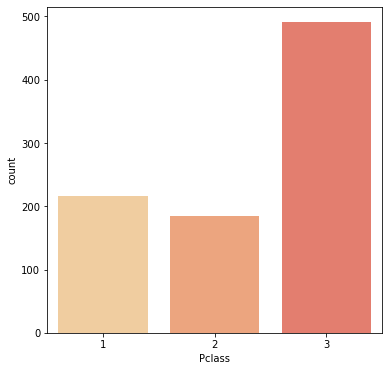

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Pclass', data=train)
plt.show()
# Majority of Passengers were of Class-3

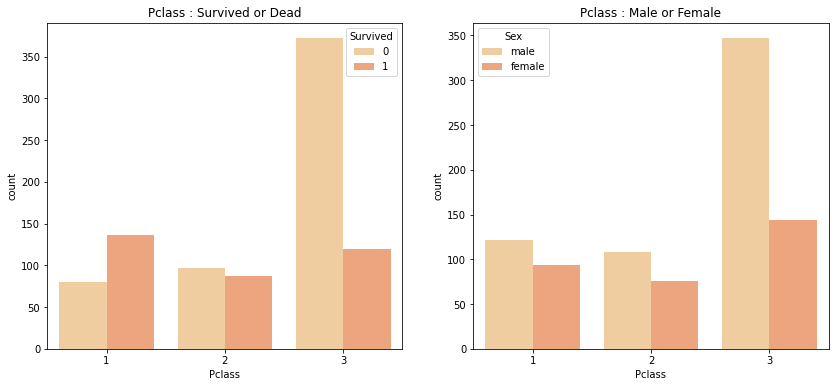

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, ax=ax[0])
ax[0].set_title("Pclass : Survived or Dead")
sns.countplot(x='Pclass', hue='Sex', data=train, ax=ax[1])
ax[1].set_title("Pclass : Male or Female")
plt.show()
# Except class-1, in every class more people have died than survived
# Every class has a majority of Male passengers when compared to Female

<Figure size 504x504 with 0 Axes>

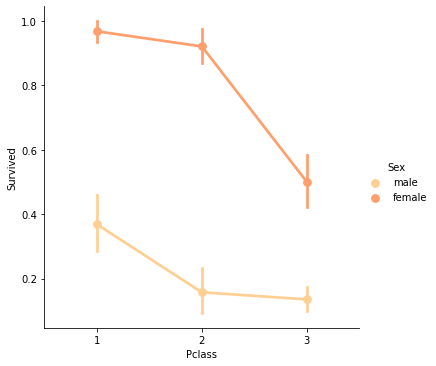

In [13]:
plt.figure(figsize=(7, 7))
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='point')
plt.show()
# Survival Rate of Females is more than Males in every class
# Significant drop in survival rate of Females from class-2 to class-3

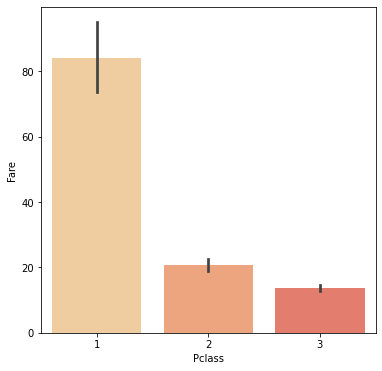

In [14]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Pclass', y='Fare', data=train)
plt.show()

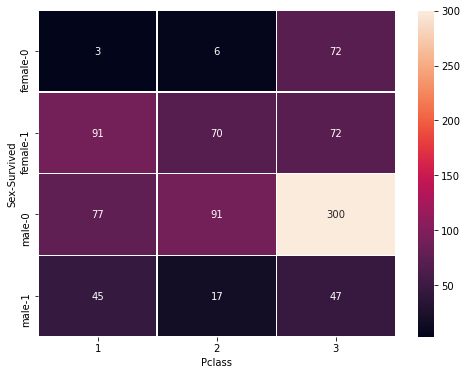

In [15]:
plt.figure(figsize=(8, 6))
df = pd.DataFrame(pd.crosstab([train['Sex'], train['Survived']], train['Pclass'], margins=True))
df.drop('All', axis=1, inplace=True)
df.drop('All', axis=0, inplace=True, level=0)
sns.heatmap(df, annot=True, fmt='d', linewidth=.5)
plt.show()
# In class-1, almost double the amount of Females survived than Males
# and very few Females of class-1 died when compared to other classes
# In class-2, Female survival rate to Male is a lot more than in class-1
# Whereas, the Male death rate to Female has also increased by a small amount
# In class-3, the overall survival rate is very low
# A very large number of Men and Women died but the survival ratio of Men

In [16]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
train['Age'].isna().sum()

177

In [18]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Age'].isna().sum()

0

In [19]:
train['Age_Group'] = train['Age'].apply(lambda x : int(x/10))
train['Age_Group'].value_counts()

2    397
3    167
1    102
4     89
0     62
5     48
6     19
7      6
8      1
Name: Age_Group, dtype: int64

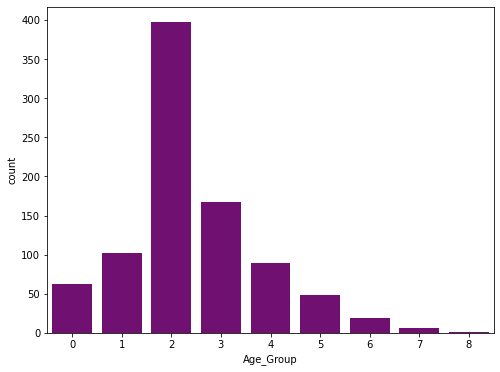

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Group', data=train, color='purple')
plt.show()
# Most Passengers were of age 20-40
# There were more younger passengers than older ones

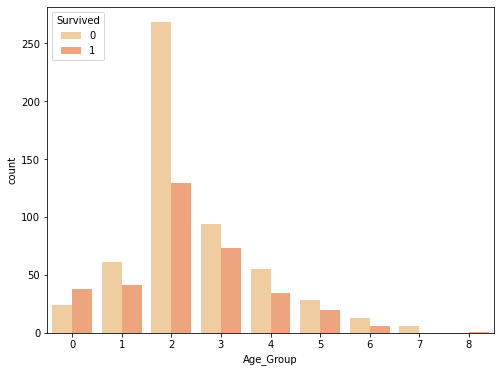

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Survived', data=train)
plt.show()
# Except age 0-10, in every age group there has been more death than survival
# Except age 20-30, in every age group there is a similar Death/Survival rate

<Figure size 1008x432 with 0 Axes>

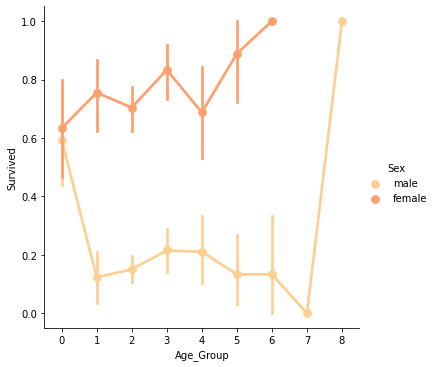

In [22]:
plt.figure(figsize=(14,6))
sns.catplot(x='Age_Group', y='Survived', hue='Sex', data=train, kind='point')
plt.show()
# Lowest Female survival rate between 0-10 age
# Highest Female survival rate between 60-70 age
# Highest Male survival rate between 0-10 and 80-90
# Lowest Male survival rate between 70-80

In [23]:
train.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Age_Group      0
dtype: int64

In [24]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train['Embarked'].fillna(value='S', inplace=True)
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

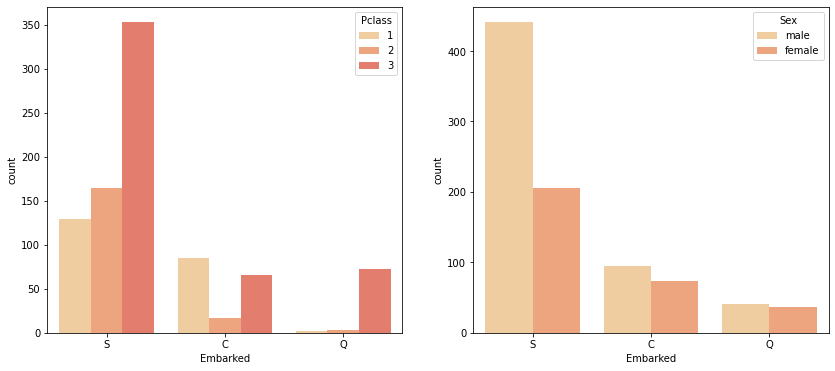

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Embarked', hue='Pclass', data=train, ax=ax[0])
sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[1])
plt.show()

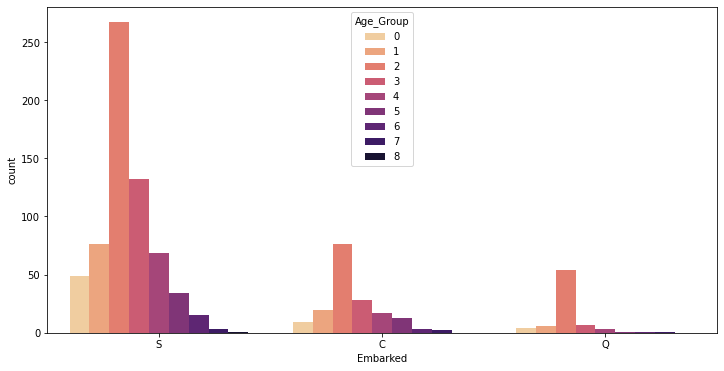

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', hue='Age_Group', data=train)
plt.show()

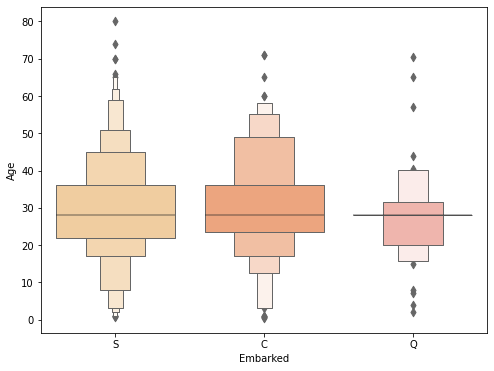

In [28]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Embarked', y='Age', data=train)
plt.show()

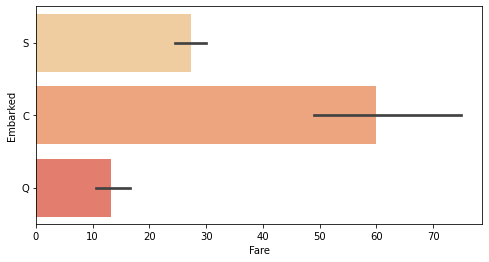

In [29]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Fare', y='Embarked', data=train)
plt.show()